従来のTAP実験データにおける解析方法により，人工データから実験パラメータを求める．

ただし今回は拡散係数$D_{e}$を既知とする。

1.

\begin{align}
    t_{res} = \frac{m_1}{m_0} = \frac{\int_{0}^{\infty}dt\, tF\left(t, L\right)}{\int_{0}^{\infty}dt F\left(t, L\right)}
\end{align}

を数値的に計算。

2.

\begin{align}
    t_{res} = \frac{\epsilon_{b}L^{2}}{2D_{e}}\left(1+K_{eq}\right) \Rightarrow K_{eq} = \frac{2D_{e}}{\epsilon_{b}L^{2}}t_{res}-1
\end{align}

より$K_{eq}$を求める。

3.

\begin{align}
    \frac{m_{2}}{m_{0}} = \frac{\int_{0}^{\infty}\, t^{2}F\left(t, L\right)}{\int_{0}^{\infty}F\left(t, L\right)}
\end{align}

を数値的に計算。

4.

\begin{align}
    & \frac{m_2}{m_0} = \frac{5\epsilon_b^2L^4}{12D_e^{2}}\left(1+K_{eq}\right)^2 + \frac{\epsilon_{b}L^2}{D_ek_a}K_{eq}^2 \\
    \Rightarrow & k_a = \frac{\epsilon_{b}L^{2}K_{eq}^{2}}{D_{e}}\left(\frac{m_2}{m_0}-\frac{5\epsilon_b^2L^4}{12D_e^{2}}\left(1+K_{eq}\right)^2 \right)^{-1}
\end{align}

より$k_a$を求める。

5.

\begin{align}
    k_{d} = k_{a}/K_{eq}
\end{align}

より$k_{d}$を求める。

In [1]:
import numpy as np
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

読み込みファイル，計算に使用するデータ数，モンテカルロステップ数`T`，モンテカルロサンプル数`sample`を指定．

`epsilon` と `length` は今後の計算に必要．

In [2]:
r_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6.dat'
data_points = 5000
#T = 10
#sample = 5
#model = 0.1*np.arange(0, 11, 2, dtype=float)
#model = 0.1*np.arange(0, 11, dtype=float)
#model = 0.01*np.arange(0, 101, 5, dtype=float)
#print(model)

# true_diffusivity = 1.5
# true_k_a = 20.0
# true_k_d = 5.0
# true_standard_deviation = 5e-6
epsilon = 1.0
length = 35.0

以下の `cell` でファイルからデータを読み込む．

5000 	 5000


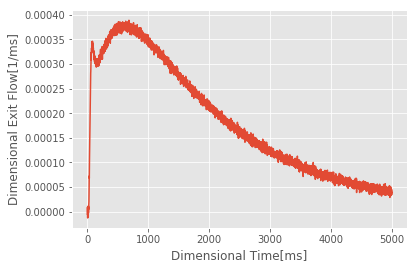

In [3]:
dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(r_file, "r"):
    if i%(5000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

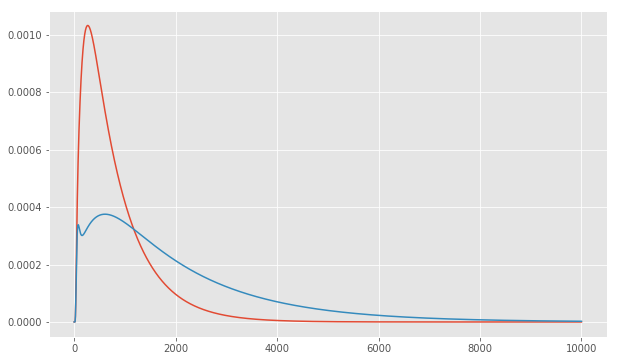

In [4]:
def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(65):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow


dimensional_time = np.arange(1, 50001, dtype=int)
dimensional_exit_flow_1 = Flow(1.5, 20, 20, epsilon, length, dimensional_time)
dimensional_exit_flow_2 = Flow(1.5, 20, 5, epsilon, length, dimensional_time)
# for i in range(dimensional_time.shape[0]):
#     dimensional_exit_flow[i] += 5*10**-6*np.random.randn()

dimensionless_time = dimensional_time * 1.5/(epsilon*length**2)
dimensionless_exit_flow_1 = dimensional_exit_flow_1 * (epsilon*length**2)/1.5
dimensionless_exit_flow_2 = dimensional_exit_flow_2 * (epsilon*length**2)/1.5

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(dimensional_time[:10001], dimensional_exit_flow_1[:10001])
ax.plot(dimensional_time[:10001], dimensional_exit_flow_2[:10001])

plt.show()

In [5]:
print("dimensional ka : ", 20*1.5/(epsilon*length**2))
print('dimensional kd : ', 20*1.5/(epsilon*length**2))

dimensional ka :  0.024489795918367346
dimensional kd :  0.024489795918367346


In [6]:
print("dimensional ka : ", 20*1.5/(epsilon*length**2))
print('dimensional kd : ', 5*1.5/(epsilon*length**2))

dimensional ka :  0.024489795918367346
dimensional kd :  0.006122448979591836


In [7]:
def zeroth_moments(time, exit_flow):
    
    z_moments = integrate.simps(exit_flow, time)
    
    return z_moments

#print(zeroth_moments(dimensional_time, dimensional_exit_flow))

def first_moments(time, exit_flow):
    
    integrand = time * exit_flow
    f_moments = integrate.simps(integrand, time)

    return f_moments

#print(first_moments(dimensional_time, dimensional_exit_flow_2))

def second_moments(time, exit_flow):
    
    integrand = (time**2) * exit_flow
    s_moments = integrate.simps(integrand, time)
    
    return s_moments

#print(second_moments(dimensional_time, dimensional_exit_flow))

In [8]:
def residence_time(time, exit_flow):
    
    z_moments = zeroth_moments(time, exit_flow)
    f_moments = first_moments(time, exit_flow)

    return f_moments / z_moments


def equilibrium_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow):

    return ((2.*diffusivity)/(epsilon*length**2))*residence_time(dimensional_time, dimensional_exit_flow) - 1.


# print(residence_time(dimensional_time, dimensional_exit_flow))
# print(epsilon*length**2/(2.*1.5)*(1+equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow)))
# print(equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow))

In [9]:
print(equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1))
print(equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2))

0.999995650441
3.99998927404


In [10]:
def adsorption_rate_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow):
    
    K = equilibrium_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow)
    
    adsorption_rate = (K**2 * length**2 *epsilon)/diffusivity
    adsorption_rate /= ( second_moments(dimensional_time, dimensional_exit_flow)\
                        /zeroth_moments(dimensional_time, dimensional_exit_flow)\
                        -(5*epsilon**2*length**4)/(12*diffusivity**2) * (1+K)**2 )
    return adsorption_rate

print(adsorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1))
print(adsorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2))

print('dimensionless: ', adsorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1)\
      *(epsilon*length**2)/1.5)
print('dimensionless: ', adsorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2)\
      *(epsilon*length**2)/1.5)

0.0244879539512
0.0244890930542
dimensionless:  19.9984957268
dimensionless:  19.9994259943


In [11]:
def desorption_rate_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow):
    
    K = equilibrium_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow)
    ka = adsorption_rate_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow)
    
    return ka/K

print(desorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1))
print(desorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2))

print('dimensionless: ', desorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1)\
      *(epsilon*length**2)/1.5)
print('dimensionless: ', desorption_rate_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2)\
      *(epsilon*length**2)/1.5)

0.0244880604635
0.00612228968041
dimensionless:  19.9985827118
dimensionless:  4.99986990567


In [14]:
print(second_moments(dimensionless_time, dimensionless_exit_flow_1)/zeroth_moments(dimensionless_time, dimensionless_exit_flow_1))
print(second_moments(dimensionless_time, dimensionless_exit_flow_2)/zeroth_moments(dimensionless_time, dimensionless_exit_flow_2))

1.71666274339
11.2166406822


In [67]:
def analytic_second_moments(k_a, k_d):
    
    summation = 0.0
    
    for n in range(10001):
        pn = p_n(n)
        summation += (-1)**(n+1) * (2.*n+1.)\
                        *( ((r_plus(pn, k_a, k_d)**4-r_minus(pn, k_a, k_d)**4)\
                            +(r_plus(pn, k_a, k_d)**3-r_minus(pn, k_a, k_d)**3)*(pn**2+k_a))\
                          /(r_plus(pn, k_a, k_d)**3*r_minus(pn, k_a, k_d)**3*(r_plus(pn, k_a, k_d)-r_minus(pn, k_a, k_d))) )
        
    summation *= 2.*np.pi
    
    return summation

In [68]:
print(analytic_second_moments(20, 20))
print(analytic_second_moments(20, 5))

1.71666666667
11.2166666667


In [48]:
ad = 0.1*np.arange(100, 501)
print(equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1))

des = ad/equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_1)

0.999995650441


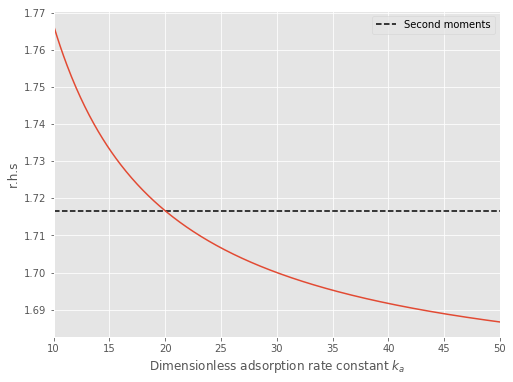

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

xmin, xmax = 10, 50

ax.plot(ad, analytic_second_moments(ad, des))
ax.hlines(second_moments(dimensionless_time, dimensionless_exit_flow_1)\
          /zeroth_moments(dimensionless_time, dimensionless_exit_flow_1), xmin, xmax, linestyles='dashed', \
         label='Second moments')

ax.set_xlim(xmin, xmax)
ax.set_xlabel('Dimensionless adsorption rate constant $k_a$')
ax.set_ylabel('r.h.s')

plt.legend(loc='upper right')

plt.savefig('moments_analysis_fig1.png')

plt.show()

In [60]:
ad = 0.1*np.arange(100, 501)
print(equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2))

des = ad/equilibrium_constant(1.5, epsilon, length, dimensional_time, dimensional_exit_flow_2)

3.99998927404


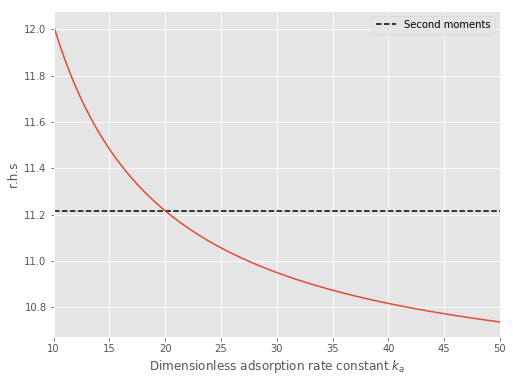

In [74]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

xmin, xmax = 10, 50

ax.plot(ad, analytic_second_moments(ad, des))
ax.hlines(second_moments(dimensionless_time, dimensionless_exit_flow_2)\
          /zeroth_moments(dimensionless_time, dimensionless_exit_flow_2), xmin, xmax, linestyles='dashed', 
         label='Second moments')

ax.set_xlim(xmin, xmax)
ax.set_xlabel('Dimensionless adsorption rate constant $k_a$')
ax.set_ylabel('r.h.s')

plt.legend(loc='upper right')

plt.savefig('moments_analysis_fig2.png')

plt.show()

In [71]:
def hoge(k_a, k_d):
    
    #K = equilibrium_constant(diffusivity, epsilon, length, dimensional_time, dimensional_exit_flow)
    K = k_a/k_d
    
    return 5/12 * (1.+K)**2 + K/k_d

In [72]:
print(hoge(20, 20))
print(hoge(20, 5))

1.7166666666666668
11.216666666666669
